In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [92]:
df = pd.read_csv('Dane.csv', sep=';')

In [93]:
df.head()

,OrderID,DateOrder,TimeOrder,OrderValue,COGS,OrderChannel,OrderRegion
0,100001,2020-06-18,02:48:50,5655.0,"4 919,85",2,15
1,100002,2020-06-18,03:14:27,2038.0,"1 548,88",4,18
2,100003,2020-06-18,03:52:59,1553.0,"1 195,81",1,26
3,100004,2020-06-18,06:13:20,4460.0,"3 701,80",1,22
4,100005,2020-06-18,06:13:39,4837.0,"4 450,04",3,19


In [94]:
print(df.dtypes)

OrderID           int64
DateOrder        object
TimeOrder        object
OrderValue      float64
COGS             object
OrderChannel      int64
OrderRegion       int64
dtype: object


In [95]:
df['COGS'] = df['COGS'].str.replace(',', '.').str.replace(' ', '').astype(float)

In [96]:
print(df.dtypes)
df.head()

OrderID           int64
DateOrder        object
TimeOrder        object
OrderValue      float64
COGS            float64
OrderChannel      int64
OrderRegion       int64
dtype: object


,OrderID,DateOrder,TimeOrder,OrderValue,COGS,OrderChannel,OrderRegion
0,100001,2020-06-18,02:48:50,5655.0,4919.85,2,15
1,100002,2020-06-18,03:14:27,2038.0,1548.88,4,18
2,100003,2020-06-18,03:52:59,1553.0,1195.81,1,26
3,100004,2020-06-18,06:13:20,4460.0,3701.80,1,22
4,100005,2020-06-18,06:13:39,4837.0,4450.04,3,19


In [97]:
df['Margin']= df['OrderValue'] - df['COGS']
df.head()

,OrderID,DateOrder,TimeOrder,OrderValue,COGS,OrderChannel,OrderRegion,Margin
0,100001,2020-06-18,02:48:50,5655.0,4919.85,2,15,735.15
1,100002,2020-06-18,03:14:27,2038.0,1548.88,4,18,489.12
2,100003,2020-06-18,03:52:59,1553.0,1195.81,1,26,357.19
3,100004,2020-06-18,06:13:20,4460.0,3701.80,1,22,758.20
4,100005,2020-06-18,06:13:39,4837.0,4450.04,3,19,386.96


In [98]:

df['Date'] = pd.to_datetime(df['DateOrder'])  
df.sort_values(by='Date', inplace=True)  

df['CumMargin'] = df['Margin'].cumsum()


yearly_margin = df.groupby(df['Date'].dt.year)['CumMargin'].max()


kpi_target = 40000000
kpi_2021 = yearly_margin.get(2021, 0) >= kpi_target
kpi_2022 = yearly_margin.get(2022, 0) >= kpi_target

print(f"2021 - Osiągnięto KPI: {kpi_2021}")
print(f"2022 - Osiągnięto KPI: {kpi_2022}")

2021 - Osiągnięto KPI: True
2022 - Osiągnięto KPI: True


In [99]:
data_2022 = df[df['Date'].dt.year == 2022]
for channel in data_2022['OrderChannel'].unique():
   
    channel_data = data_2022[data_2022['OrderChannel'] == channel]
    
   
    channel_data.sort_values(by=['OrderRegion', 'Date'], inplace=True)

    df.drop_duplicates(inplace=True)
    df.dropna(subset=['OrderValue', 'COGS'], how='all', inplace=True)
    df['COGS'].fillna(df['OrderValue'] * 0.85, inplace=True)
    
   
    file_name = f'dane_{channel}_2022.csv'
    channel_data.to_csv(file_name, index=False, sep=';')
    print(f'Zapisano dane dla kanału {channel} do pliku {file_name}')

C:\Users\Kuba\AppData\Local\Temp\ipykernel_19568\2363174024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_data.sort_values(by=['OrderRegion', 'Date'], inplace=True)


Zapisano dane dla kanału 1 do pliku dane_1_2022.csv


C:\Users\Kuba\AppData\Local\Temp\ipykernel_19568\2363174024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_data.sort_values(by=['OrderRegion', 'Date'], inplace=True)


Zapisano dane dla kanału 3 do pliku dane_3_2022.csv


C:\Users\Kuba\AppData\Local\Temp\ipykernel_19568\2363174024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_data.sort_values(by=['OrderRegion', 'Date'], inplace=True)


Zapisano dane dla kanału 2 do pliku dane_2_2022.csv
Zapisano dane dla kanału 4 do pliku dane_4_2022.csv


C:\Users\Kuba\AppData\Local\Temp\ipykernel_19568\2363174024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_data.sort_values(by=['OrderRegion', 'Date'], inplace=True)


In [127]:

df['DateOrder'] = pd.to_datetime(df['DateOrder'])
df['TimeOrder'] = pd.to_datetime(df['TimeOrder'], format='%H:%M:%S')


df_2022 = df[df['DateOrder'].dt.year == 2022]

def determine_daytime(time_str):
    time = pd.Timestamp(time_str).time()
    if pd.Timestamp('23:00').time() <= time or time <= pd.Timestamp('07:00').time():
        return 'Night'
    else:
        return 'Day'
df_2022['Daytime'] = df_2022['TimeOrder'].apply(determine_daytime)

result = df_2022.groupby(df_2022['DateOrder'].dt.month).agg({
    'OrderValue': 'sum',
    'OrderID': 'count'
}).reset_index()
result2 = df_2022.groupby(['OrderChannel','Daytime']).agg({
    'OrderValue': 'sum',
    'OrderID': 'count'
}).reset_index()
result3 = df_2022.groupby(['OrderRegion','Daytime']).agg({
    'OrderValue': 'sum',
    'OrderID': 'count'
}).reset_index()
result4 = df_2022.groupby('Daytime').agg({
    'OrderValue': 'sum',
    'OrderID': 'count'
}).reset_index()
result5 = df_2022.groupby(['OrderChannel','Daytime','OrderRegion',df_2022['DateOrder'].dt.month]).agg({
    'OrderValue': 'sum',
    'OrderID': 'count'
}).reset_index()

print(result)
print(result2)
print(result3)
print(result4)
print(result5)

    DateOrder  OrderValue  OrderID
0           1  25181291.0     3868
1           2  21563516.0     3289
2           3  23518768.0     3627
3           4  23968882.0     3685
4           5  24171481.0     3734
5           6  22463824.0     3545
6           7  25310074.0     3902
7           8  23803311.0     3683
8           9  23089219.0     3569
9          10  25758800.0     3944
10         11  23039833.0     3532
11         12  24638782.0     3783
   OrderChannel Daytime   OrderValue  OrderID
0             1     Day  114927188.0    17745
1             1   Night   23383938.0     3624
2             2     Day   58047351.0     8963
3             2   Night   11680605.0     1783
4             3     Day   41464527.0     6387
5             3   Night    8423209.0     1315
6             4     Day   23775593.0     3597
7             4   Night    4805370.0      747
    OrderRegion Daytime  OrderValue  OrderID
0             1     Day   4119815.0      638
1             1   Night    956548.0      

C:\Users\Kuba\AppData\Local\Temp\ipykernel_19568\1171365449.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Daytime'] = df_2022['TimeOrder'].apply(determine_daytime)


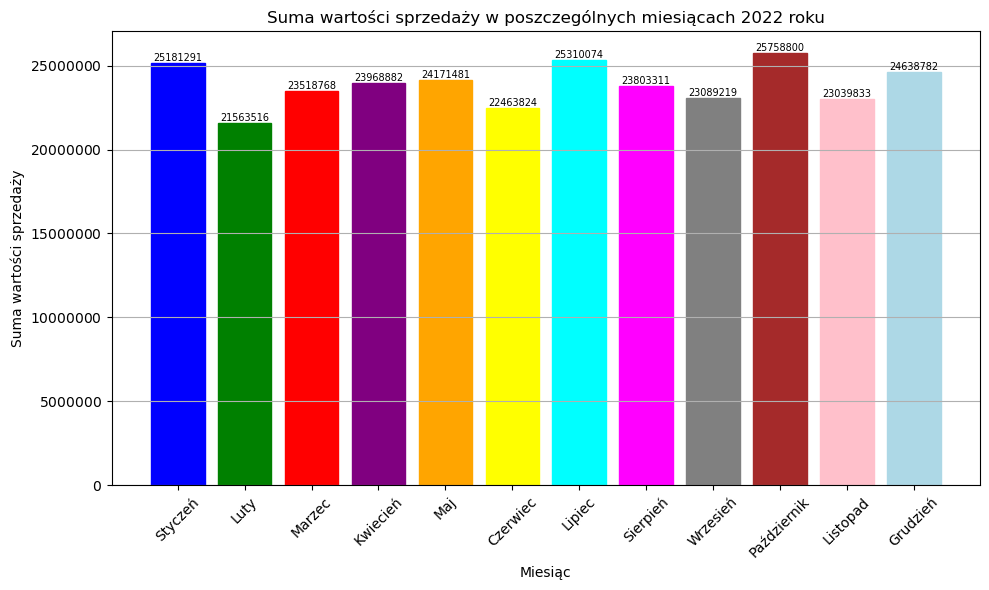

In [138]:
df_2022 = df[df['DateOrder'].dt.year == 2022]


monthly_sales = df_2022.groupby(df_2022['DateOrder'].dt.month)['OrderValue'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, tick_label=['Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'])


colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown', 'pink', 'lightblue']
for bar, color, value in zip(bars, colors, monthly_sales.values):
    bar.set_color(color)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.0f}', ha='center', va='bottom', fontsize=7, color='black')

plt.title('Suma wartości sprzedaży w poszczególnych miesiącach 2022 roku')
plt.xlabel('Miesiąc')
plt.ylabel('Suma wartości sprzedaży')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.gca().get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', axis='y')

plt.tight_layout()


plt.show()